<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Татьяна!</b>

Меня зовут Алексей Косенко, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Привет! Ничего себе! Как же все-таки приятно:) Есть пару вопросов. О них ниже.
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Хорошо, постараюсь на все ответить, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

# Сеть фитнес-центров «Культурист-датасаентист»

**Описание проекта**
Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.
<br/> 
**Задачи**: 
<br/> 
1. научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
2. сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
3. проанализировать основные признаки, наиболее сильно влияющие на отток;
4. сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.
<br/> 
**Описание данных**:<br/>
Данные клиента за предыдущий до проверки факта оттока месяц:<br/>
'gender' — пол;<br/>
'Near_Location' — проживание или работа в районе, где фитнес-центр;<br/>
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент);<br/>
Promo_friends — по акции «приведи друга»;<br/>
'Phone' — наличие контактного телефона;<br/>
'Age' — возраст;<br/>
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).<br/>
<br/>
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: <br/>
'Contract_period' — длительность текущего абонемента (месяц, 6 месяцев, год);<br/>
'Month_to_end_contract' — срок до окончания абонемента (в месяцах);<br/>
'Group_visits' — посещение групповых занятий;<br/>
'Avg_class_frequency_total' — средняя частота посещений в неделю за весь период;<br/>
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;<br/>
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра;<br/>
'Churn' — факт оттока в текущем месяце.<br/>

**План работы:**
<br>[Шаг 1. Открытие данных](#section_id_0)
<br>[Шаг 2. Исследовательский анализ данных (EDA)](#section_id_1)
<br>[Шаг 3. Модель прогнозирования оттока клиентов](#section_id_2)
<br>[Шаг 4. Кластеризация клиентов](#section_id_3)
<br>[Шаг 5. Выводы и базовые рекомендации по работе с клиентами](#section_id_4)

# Шаг 1. Загрузите данные и подготовьте их к анализу <a id='section_id_0'></a>

**Импортируем библиотеки**

In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 6)})
import matplotlib.pyplot as plt
import scipy.stats as st
import math as mth
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from joblib import dump
from plotly import graph_objects as go

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv', sep=',')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


In [3]:
#df.info()

In [4]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.columns = [i.lower() for i in df]
df.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [6]:
#df.isna().sum()

In [7]:
display('Дубликаты в таблице df:', df.duplicated().sum())

'Дубликаты в таблице df:'

0

In [8]:
df = df.rename(columns={'avg_additional_charges_total':'avg_add_charges_total','month_to_end_contract': 'month_to_end', 'avg_class_frequency_total': 'avg_freq_total', 'avg_class_frequency_current_month':'avg_freq_current_month'})
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_add_charges_total,month_to_end,lifetime,avg_freq_total,avg_freq_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1,3,1.11,1.12,0


In [9]:
df = df[['gender',
         'age',
         'near_location',
         'partner',
         'promo_friends',
         'phone',
         'group_visits',
         'avg_add_charges_total',
         'contract_period',
         'lifetime',
         'month_to_end',
         'avg_freq_total',
         'avg_freq_current_month',
         'churn']]
#df

**Вывод**
<br/>
В целом данные чистые. Поменяла формат float на int для оставшихся месяцев до окончания абонемента. Отредактировала названия столбцов и регистр. Нет явных дубликатов и пропусков. Изменила очередность столбцов

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, данные на месте, можно переходить к исследовательскому анализу</div>

# Шаг 2. Исследовательский анализ данных (EDA) <a id='section_id_1'></a>

In [10]:
df.describe()

,gender,age,near_location,partner,promo_friends,phone,group_visits,avg_add_charges_total,contract_period,lifetime,month_to_end,avg_freq_total,avg_freq_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,29.18,0.85,0.49,0.31,0.90,0.41,146.94,4.68,3.72,4.32,1.88,1.77,0.27
std,0.50,3.26,0.36,0.50,0.46,0.30,0.49,96.36,4.55,3.75,4.19,0.97,1.05,0.44
min,0.00,18.00,0.00,0.00,0.00,0.00,0.00,0.15,1.00,0.00,1.00,0.00,0.00,0.00
25%,0.00,27.00,1.00,0.00,0.00,1.00,0.00,68.87,1.00,1.00,1.00,1.18,0.96,0.00
50%,1.00,29.00,1.00,0.00,0.00,1.00,0.00,136.22,1.00,3.00,1.00,1.83,1.72,0.00
75%,1.00,31.00,1.00,1.00,1.00,1.00,1.00,210.95,6.00,5.00,6.00,2.54,2.51,1.00
max,1.00,41.00,1.00,1.00,1.00,1.00,1.00,552.59,12.00,31.00,12.00,6.02,6.15,1.00


**Вывод**
1. Мужчин и женщин среди клиентов примерно поровну. 
2. Средний возраст посещающих фитнес - 29 лет. Самый юный клиент - 18 лет, самый возрастной - 41 год.
3. Люди предпочитают ходить в зал рядом с домом
4. Половина посетителей приходят из партнерских компаний
5. Треть посетителей использовали промо-код "Приведи друга"
6. 90% клиентов оставили свой номер телефона
7. 41% клиентов посещает групповые программы
8. Суммарная выручка от других услуг фитнес-центра - от 68 до 210 (тыс ?)
9. В среднем у посетителей до окончания срока действия абонемента остаётся 4 месяца
10. Средняя частота посещений в неделю за весь период 2 раза. (Видимо, до лета еще долго😜)
11. За предыдущий месяц такой же показатель - 2 раза. 
12. В среднем клиенты посещали клуб в течение 3.7 месяцев
13. Показатели оттока 27%

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, а доля оттока дополнительно говорит о дисбалансе классов в целевом признаке, это может быть важно при обучении моделей</div>

Нас особенно интересуют данные по столбцу churn. Сгруппируем данные и посмотрим на них

In [11]:
df.groupby('churn').agg({'age':'mean','avg_add_charges_total':'mean','month_to_end':'mean',\
                           'lifetime':'mean','avg_freq_total':'mean','avg_freq_current_month':'mean',\
                         'contract_period':'mean'})

,age,avg_add_charges_total,month_to_end,lifetime,avg_freq_total,avg_freq_current_month,contract_period
churn,,,,,,,
0,29.98,158.45,5.28,4.71,2.02,2.03,5.75
1,26.99,115.08,1.66,0.99,1.47,1.04,1.73


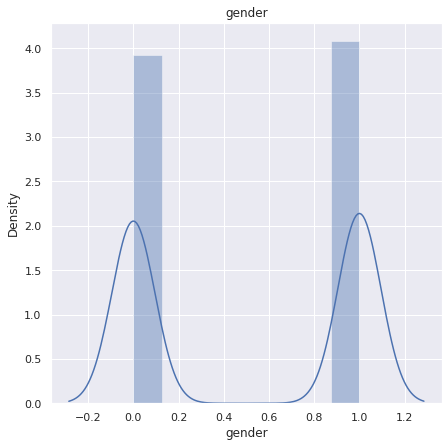

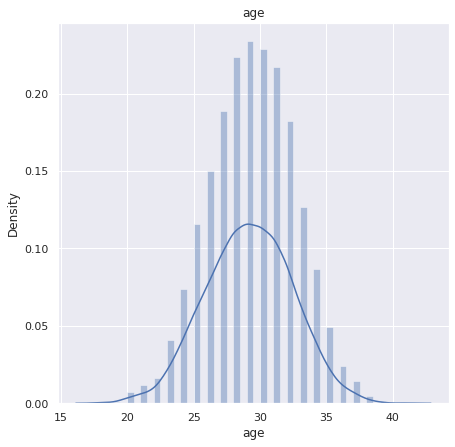

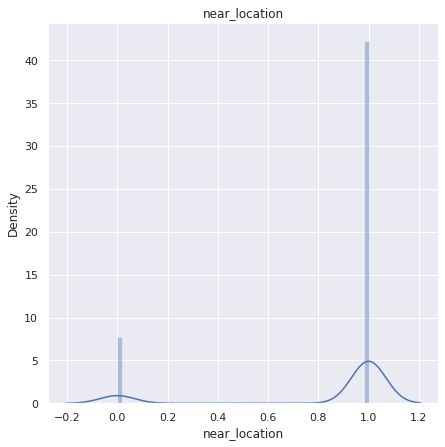

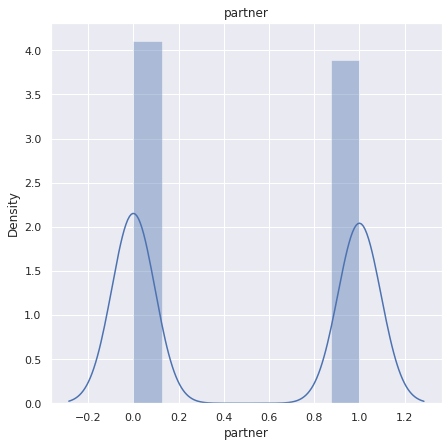

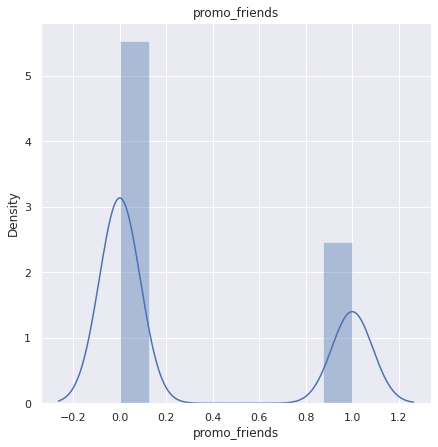

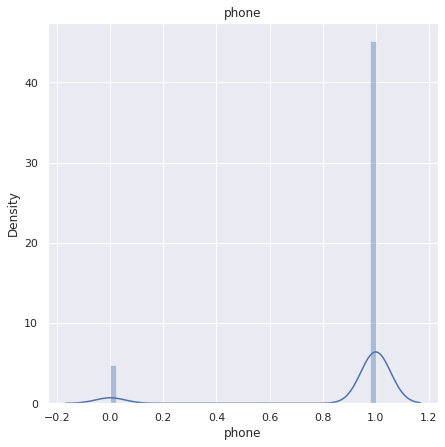

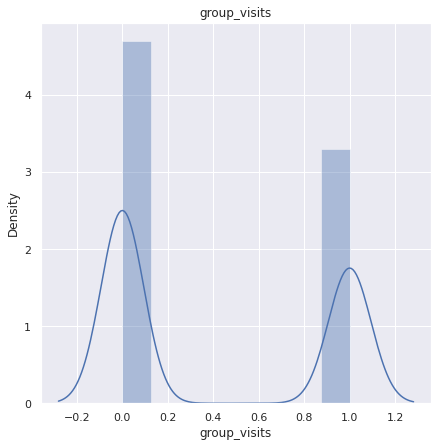

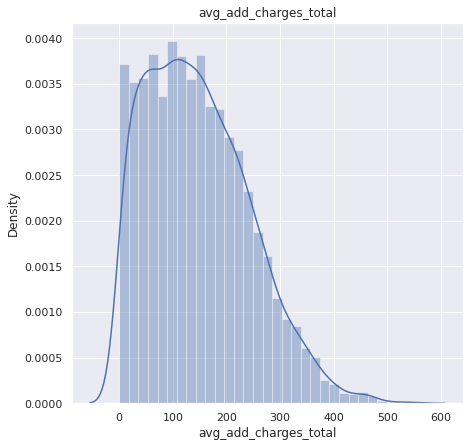

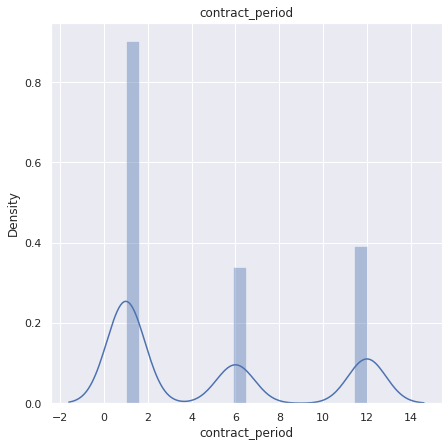

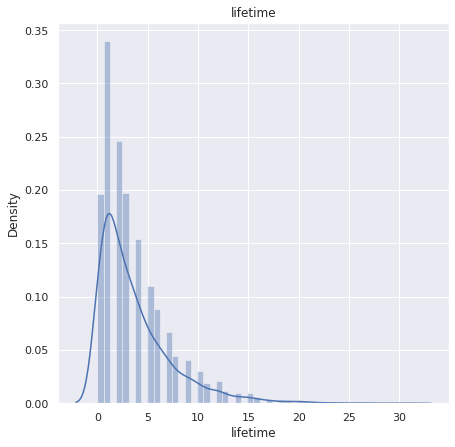

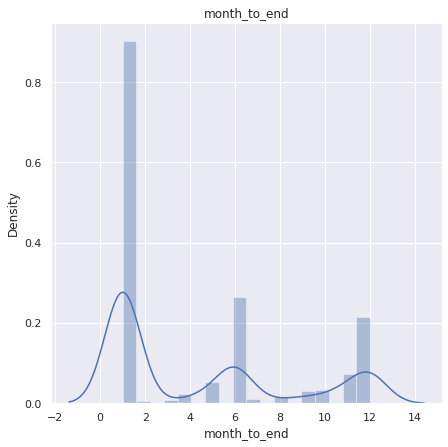

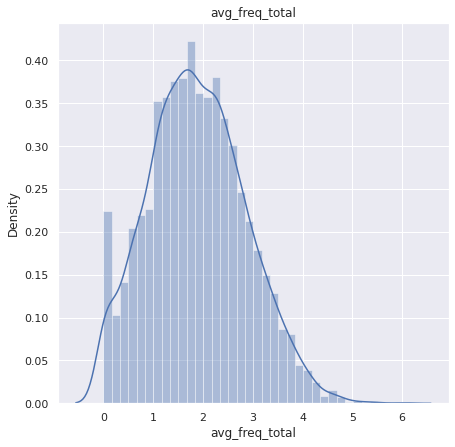

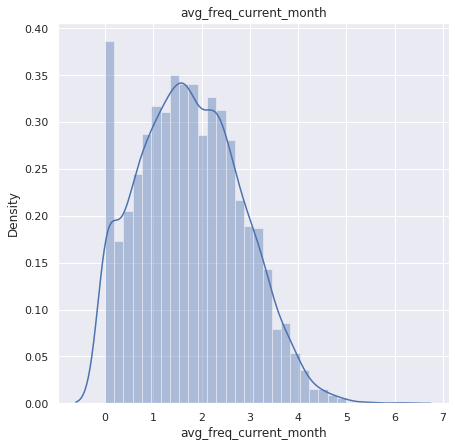

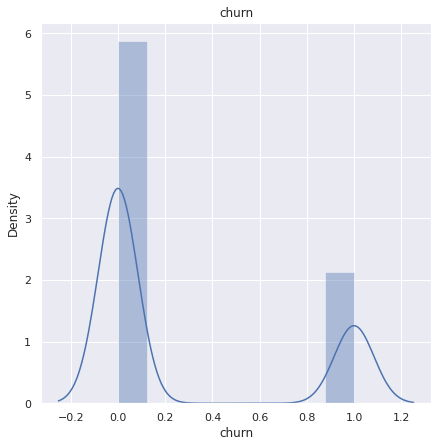

In [12]:
for column in df.columns:
    plt.figure(figsize=(7, 7))
    df.groupby('churn')[column]
    sns.distplot(df[column])

    plt.title(column)
    plt.show()

**Вывод**
<br/>
1) Cредний возраст уходящих меньше 26-27 лет. у "спортсменов" 29-30 лет.<br/>
2) Клиенты, покидающие клуб, меньше тратят на дополнительные услуги фитнес-клуба.<br/>
3) Чаще бросают ходить в фитнес клиенты, у кого остается около месяца-полутора до окончания абонемента. Среднее количество месяцев до окончания срока абонементов 5 месяцев в группе клиентов, которые остаются в клубе.<br/>
4) Важный параметр - у покидающих фитнес-клуб среднее количество посещений со дня обращения в фитнес-центр 0,9 в то время как у остающихся показатель 4.7. Значит, в большинстве случаев решение об уходе из фитнес-центра принимается в начале пользовательского опыта.<br/>
5) Так же за неделю группа оттока меньше посещает фитнес-клуб. В среднем 1 раз в неделю. У более активных клиентов этот показатель составляет 2 раза.<br/>
6) Длительность текущего абонемента у покидающих клуб клиентов меньше. В среднем 1-2 месяца. То есть, такие клиенты покидают либо сразу, либо в конце срока действия абонемента.

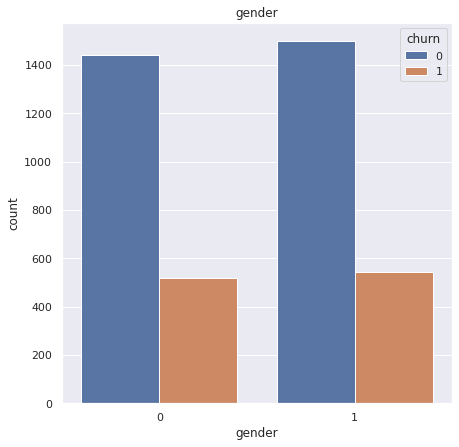

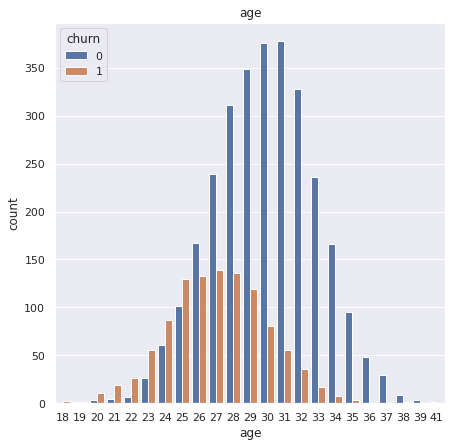

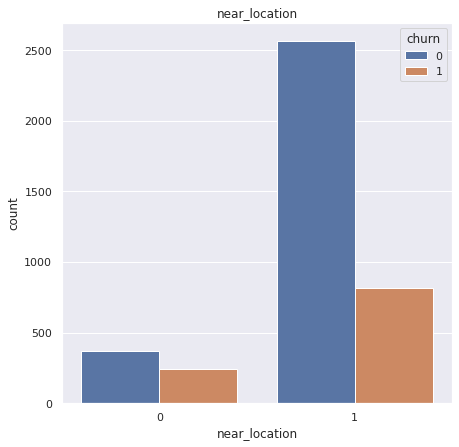

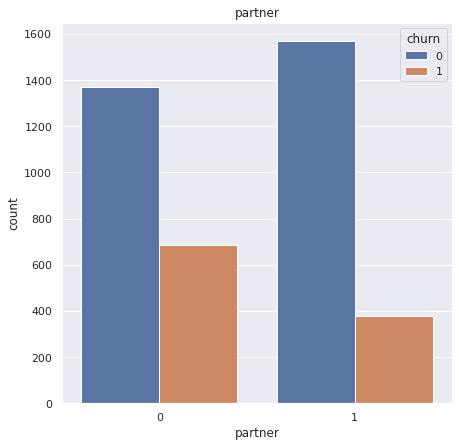

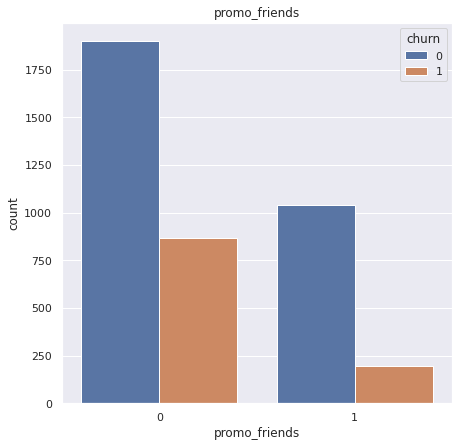

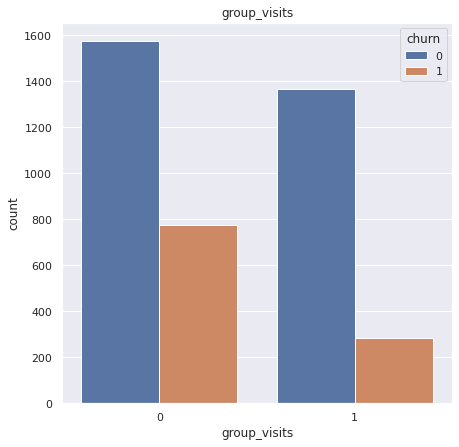

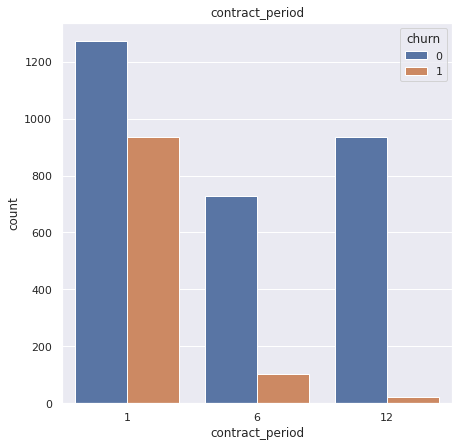

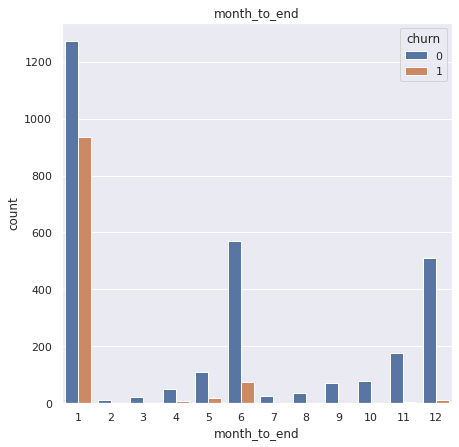

In [13]:
for column in ['gender', 'age', 'near_location', 'partner', 'promo_friends', 'group_visits', 'contract_period', 'month_to_end']:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = df[column], hue='churn', data=df)
    
    plt.title(column)
    plt.show()

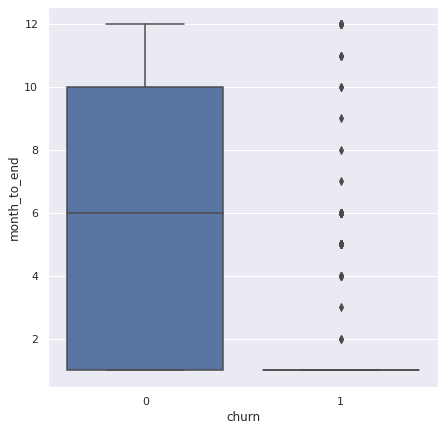

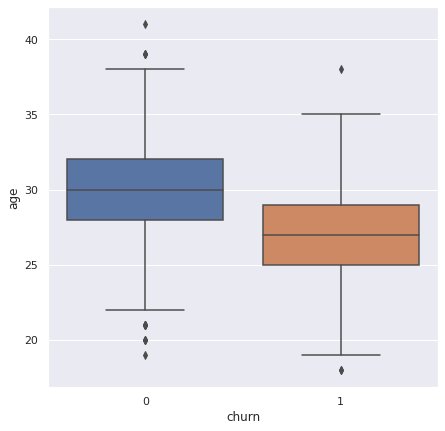

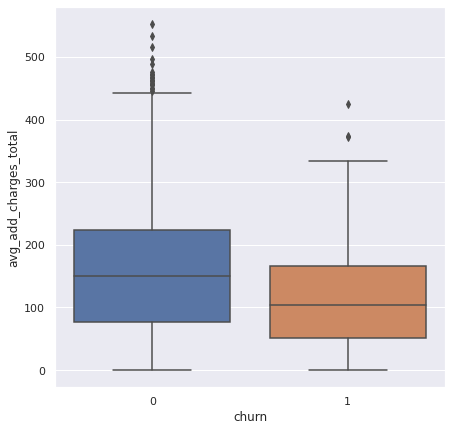

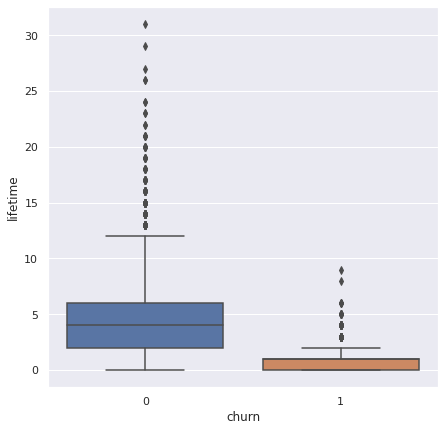

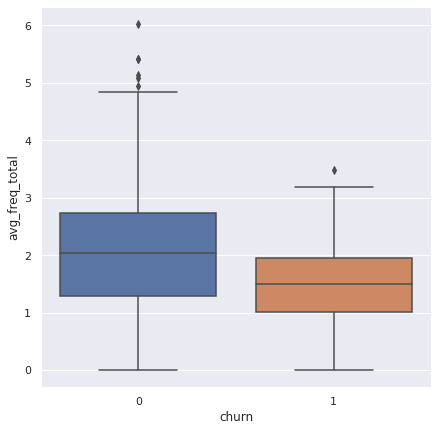

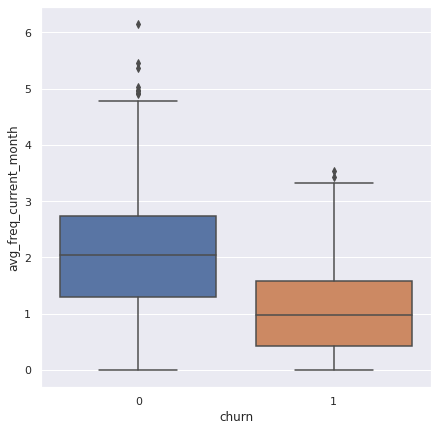

In [14]:
for column in ['month_to_end', 'age', 'avg_add_charges_total', 'lifetime', 'avg_freq_total', 'avg_freq_current_month']:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x = 'churn', y = df[column], data = df)
    plt.show()

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: классные графики!</div>

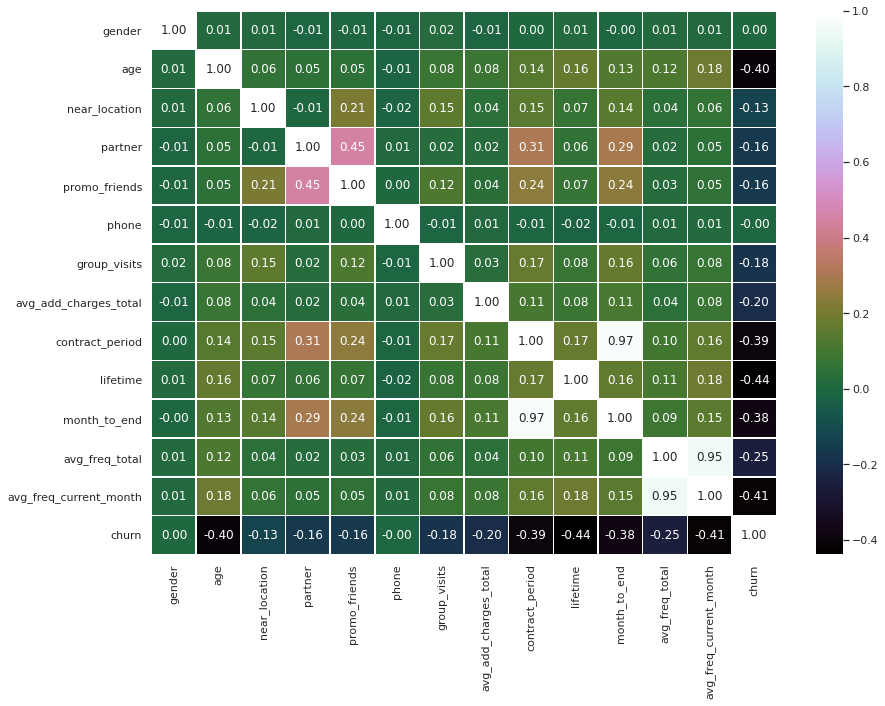

In [15]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="cubehelix")
plt.show()

**Вывод** <br/>
Признаки с нулевой корреляцией с целевой переменной churn: phone, gender<br/>
По матрице видно:<br/>
Чем больше компаний-партнеров, тем выше показатель промо "приведи друга", больше длительность текущего абонемента и больше месяцев до конца окончания абонемента.
Чем больше тех, кто пришел по промо, тем  больше длительность текущего абонемента и больше месяцев до конца окончания абонемента.
Чем ближе зал к дому или работе, тем больше показатель использование промо "приведи друга"

Отток уменьшается при следующих условиях:<br/>
Чем ближе живет человек, чем больше он пользуется партнерскими программами, если использует промо "приведи друга", чем чаще он ходит в зал, чем больше он посещает груповые занятия, чем старше человек, чем больше он тратит на другие услуги

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: в данных есть две пары мультиколлинеарных признаков, которые могут плохо влиять на обучение некоторых моделей, поэтому по одному из пар таких признаков лучше удалить, либо пояснить, почему это не обязательно</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Как я понимаю, мультиколлинеарные это: avg_freq_current_month и avg_freq_total, contract_period и month_to_end. Здесь я уж не буду удалять. В целом, у нас это никак не отразилось на работе. Но просто мы можем удалить по одному признаку из пары из датафрема и не анализировать, правильно?
    Еще я заметила, что, например, пол и наличие телефона ни на что не влияет. Показатели нулевые практически. Их тоже можно убрать? Для обучения они не нужны,наверное.


</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: попробую разбить ответ на 2 части:
    
1) на работе это действительно не отразилось, но можно попробовать разобраться, почему. Логистическая регрессия — это частный случай линейной регрессии, поэтому для нее мультиколлинеарность тоже может приводить к переобучению. Но и в логистической, и в линейной регрессиях в sklearn дополнительно реализована регуляризация, которая как раз не дает модели переобучиться. Настраивать ее можно параметром penalty, по стандарту используется L2 регуляризация.
    
Поэтому имеем следующее: с точки зрения обучения моделей, случайный лес устойчив к мультиколлинеарности, в логистической регрессии используется регуляризация, а кластеризация тоже почти не зависит от линейных зависимостей. Получается, избавляться от мультиколлинеарности не обязательно. Но если посмотреть с точки зрения интерпретации данных, то так как у нас есть данные только за месяц, то по сути эти признаки практически дублируют друг друга, поэтому их можно:
- удалить, но потерять небольшую часть важных данных;
- создать производные производные признаки(например, разность или частное) и тогда уже удалить пары целиком, так мы не потеряем ничего полезного. Создание такие признаков — это тоже один из способов борьбы с мультиколлинеарностью.
    
Еще бывают задачи, где коэффициенты и результаты модели нужно интерпретировать, там мультиколлинеарность тоже совсем не помощник.
    
А вообще, единственно верного решения с проблемой мультиколлинеарности никогда нет, в каждом случае нужно разбираться отдельно. В нашем случае нет задачи максимизировать метрики, либо как-то интерпретировать коэффициенты, которые выставляет модель признакам, поэтому оба варианта допустимы. Но на будущее хочу обратить твое внимание, что такая проблема вообще есть и про нее лучше не забывать.
    
Подробнее про регуляризацию можно почитать здесь:
* https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261
* https://craftappmobile.com/l1-%D0%B8-l2-%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F-%D0%B4%D0%BB%D1%8F-%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9-%D1%80/
    
2) Если ты хочешь узнать, влияет ли пол или наличие телефона на факт оттока, то лучшим вариантом будет изучить важность признаков, как я предлагаю ниже, это будет более точной оценкой, чем матрица корреляции, так как коэффициент Пирсона определяет только линейную зависимость    
    
</div>

# Шаг 3. Постройте модель прогнозирования оттока клиентов <a id='section_id_2'></a>

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

In [16]:
X = df.drop('churn', axis = 1)
y = df['churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: с размерами выборок все окей :)</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: так как в целевом признаке есть дисбаланс, выборки лучше стратифицировать с помощью параметра **stratify** в train_test_split. Так у тебя точно не возникнет ситуации, когда, например, в тестовой выборке соотношение классов будет сильно отличаться от соотношения в обучающей выборке

Подробнее про стратификацию:
* https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn
* https://code.likeagirl.io/good-train-test-split-an-approach-to-better-accuracy-91427584b614    
* https://habr.com/ru/post/496750/
* https://habr.com/ru/company/X5Group/blog/596279/
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)
</div>


<div class="alert alert-info">
    <b>Комментарий студента:</b> Как я понимаю, стратификация повышает точность. Тогда стоит ли стратифицировать всегда или все же зависит от ситуации?
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: стратификация гарантирует, что в подвыборках оба класса будут представлены примерно также, как и в исходной выборке. Это действительно может привести к повышению метрик, в том числе точности, так как чем лучше будут представлены классы в обеих выборках, тем лучше обучится модель. Стратификация особенно полезна при сильном дисбалансе, но и в других случаях ничего плохого она не делает, так что в задачах классификации можно использовать ее регулярно :)</div>

In [18]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошо, что масштабируешь данные, это может улучшить качество логистической регрессии</div>

In [19]:
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

def make_predictions(m, X_train_st, y_train, X_test_st, y_test):
    model = m
    model.fit(X_train_st,y_train)
    prediction = model.predict(X_test_st)
    print('Accuracy:{:.2f}, Precision:{:.2f}, Recall:{:.2f}'.format(accuracy_score(y_test, prediction),\
                                                                    precision_score(y_test, prediction),\
                                                                   recall_score(y_test, prediction)))

In [20]:
for model in models:
    print(model)
    make_predictions(m=model,X_train_st=X_train_st, y_train=y_train, X_test_st=X_test_st, y_test=y_test)

LogisticRegression(random_state=0)
Accuracy:0.92, Precision:0.85, Recall:0.83
RandomForestClassifier(random_state=0)
Accuracy:0.92, Precision:0.85, Recall:0.80


**Вывод**
<br/>
Метрика Accuracy это показатель, который описывает общую точность предсказания модели по всем классам. Это важно, если классы одинаково важны. Но классы не равные - в выборке оставшихся клиентов почти в три раза больше, метрика accuracy не работает для нас. 
Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм. Показатель Precision для регрессии и для леса одинаков. 
Метрика recall демонстрирует способность алгоритма обнаруживать данный класс вообще. Показатель выше для модели логистической регрессии.Если recall имеет большое значение, все Positive семплы классифицируются верно. Следовательно, модели можно доверять в ее способности обнаруживать представителей класса Positive. Проверим еще метрику ошибки классификации F1

In [21]:
F1_log = 2 * (0.79 * 0.83) / (0.79 + 0.83)
F1_forest = 2 * (0.81 * 0.75) / (0.81 + 0.75)
print('Метрика F1 для модели логистической регрессии:', F1_log,'\nМетрика F1 для модели случайного леса:',F1_forest)

Метрика F1 для модели логистической регрессии: 0.8095061728395061 
Метрика F1 для модели случайного леса: 0.7788461538461539


**Вывод**
<br/>
Высокий балл логистической регрессии указывает на то, что модель хорошо разбирается с точки зрения обращения с задачей дисбаланса класса.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, в этом случае accuracy не показательна из-за дисбаланса, а самая важная метрика — это именно recall, тогда логистическая регрессия тут явный фаворит </div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: если интересно, то еще можно узнать, как именно тот или иной признак влияет на обучение модели, для этого есть **feature_importances**, то есть важность признаков для решения модели. Если важность очень мала, то такие признаки можно даже удалить, метрики поменяются незначительно

Подробнее про **feature_importances**:
* https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
* https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* https://christophm.github.io/interpretable-ml-book/feature-importance.html</div>

# Шаг 4. Сделайте кластеризацию клиентов <a id='section_id_3'></a>

Выполнена стандартизация и передана получившаяся стандартизированная таблица в качестве параметра функции linkage()

In [22]:
sc = StandardScaler()
x_sc = scaler.fit_transform(df.drop(columns = ['churn']))

В переменной linked сохранена таблица «связок» между объектами. Визуализирована как дендрограмма

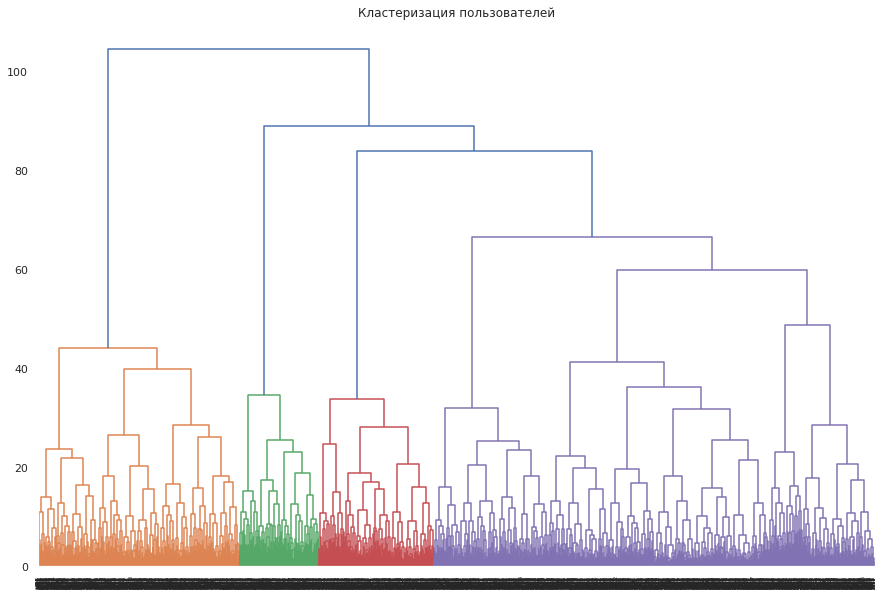

In [23]:
linked = linkage(x_sc, method='ward')

plt.figure(figsize=(15,10))
dendrogram(linked,orientation='top')
plt.title('Кластеризация пользователей')
plt.show()

**Вывод**
<br/>
Предложенное оптимальное число кластеров 5

In [24]:
km = KMeans(n_clusters=5, random_state=0)
labels= km.fit_predict(x_sc)
df['cluster'] = labels

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: окей, 5 кластеров нам подходит</div>

In [25]:
df.cluster.value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

In [26]:
df.shape[0]

4000

In [27]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
age,29.98,29.30,28.48,28.17,30.13
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
group_visits,0.54,0.43,0.22,0.34,0.47
avg_add_charges_total,160.76,143.96,135.46,131.62,161.66
contract_period,10.89,4.79,2.35,1.95,2.67
lifetime,4.74,3.92,2.81,2.44,4.90


**Вывод**
<br/>
Отток ниже в 0 и 4 кластерах, самый высокий отток во 2 и 3 кластерах. С редний показатель оттока по кластерам в 1 кластере.<br/>
Примерно в каждом кластере, кроме 4, клиентов 50/50 по полу.<br/>
В кластерах, где меньше всего отток (0,4) возраст клиентов больше. <br/> 
Только для второго кластера показатель близости фитнеса к дому или работе не важен. В остальных кластерах этот показатель важен.<br/> 0 кластер чаще остальных использовал промо "приведи друга".1,3,4 - средние показатели. Во втором кластере самый низкий показатель.(вероятно может быть связано с низким показателем near_location)<br/>
По групповым визитам 2 кластер показывает самые низкие показатели. Чуть выше - 3 кластер. В целом средние показатели для остальных кластеров.<br/>
В 0 кластере самый длительный контрактный период, время с момента первого обращения в фитнес-центр также больше в 0 и 4 кластерах, то есть ходят давно и стабильно, пользуются доп.услугами чаще остальных и тратят денег больше, чем в остальных кластерах. Маленький контрактный период в 2,3,4 кластерах. Самый маленьй контрактный период в  3 кластере. Там же и самый выский процент оттока. Вероятно стоит проверить взаимосвязь этих показателей.<br/>
Чаще ходят за последний месяц и за неделю с момента покупки абонемента 0 и 4 кластеры. И снова низкие показатели в третьем кластере. 0 кластер сильно отличается количеством месяцев до окончания срока действия абонемента. 

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: тут стоит описать все отличия кластеров, это будет полезно для бизнеса, а нам может помочь составить персональные рекомендации для каждого кластера</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Добавила  немного описание отличий в кластерах
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

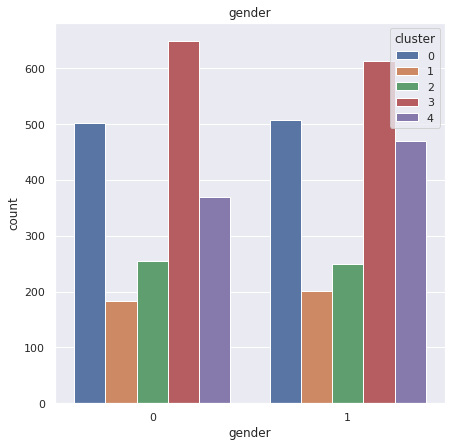

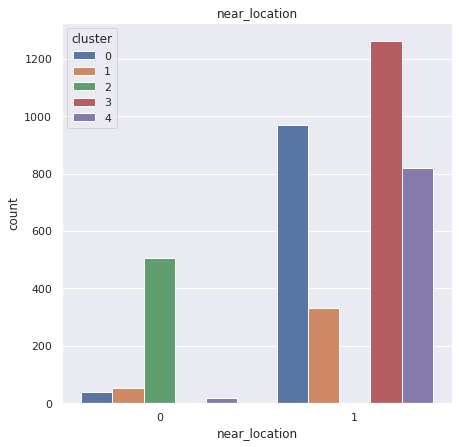

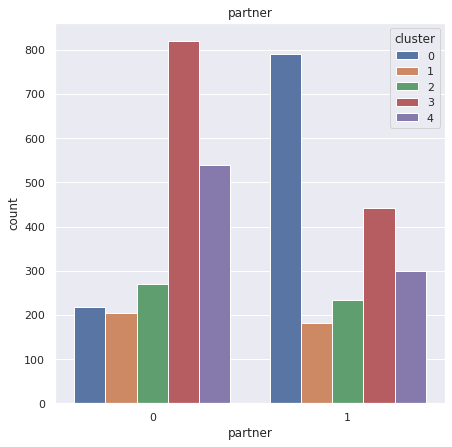

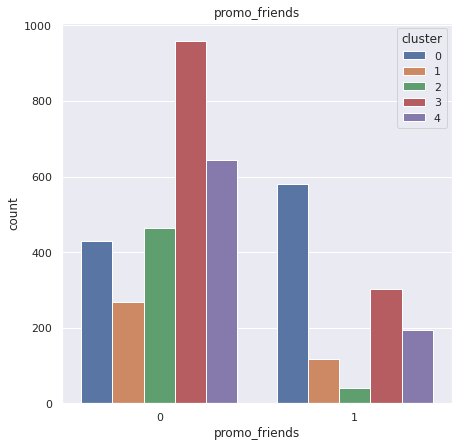

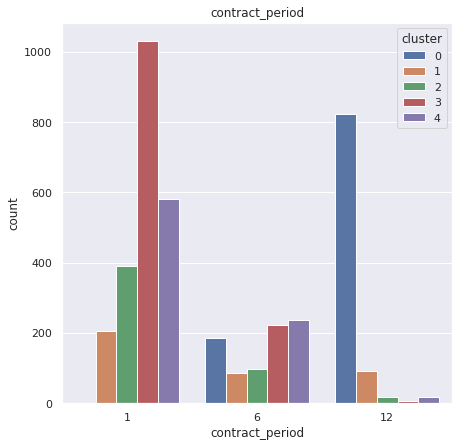

In [28]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

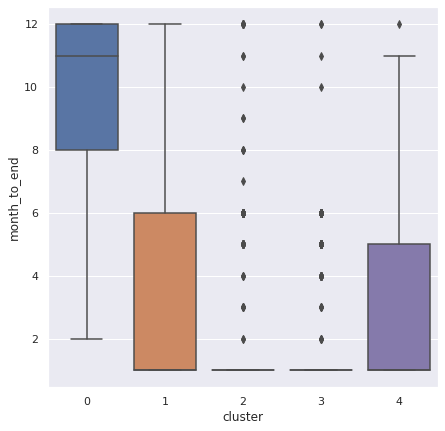

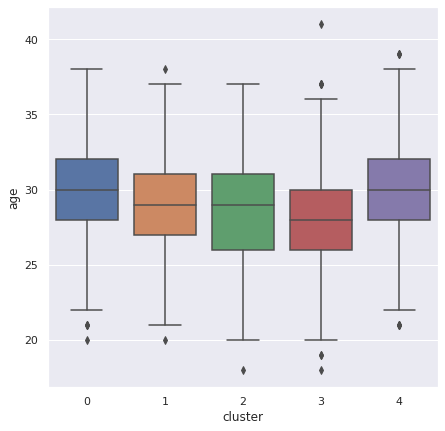

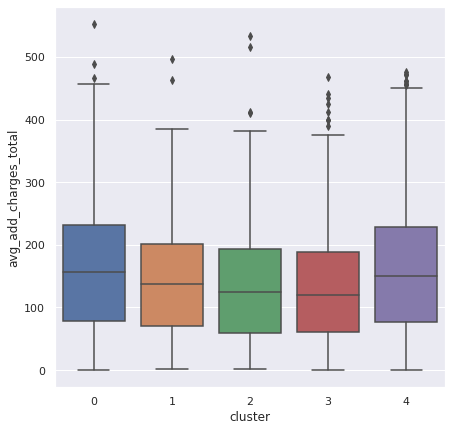

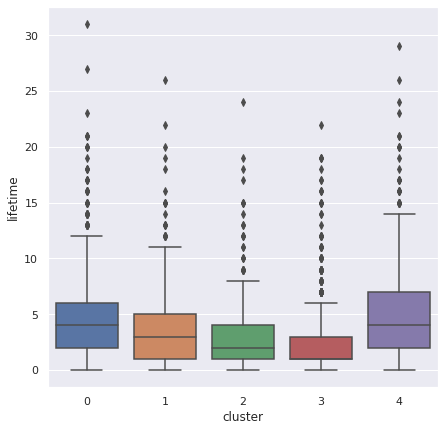

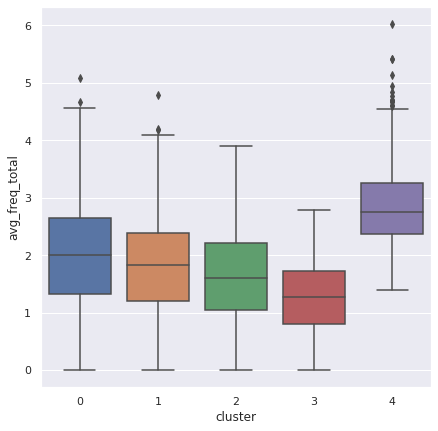

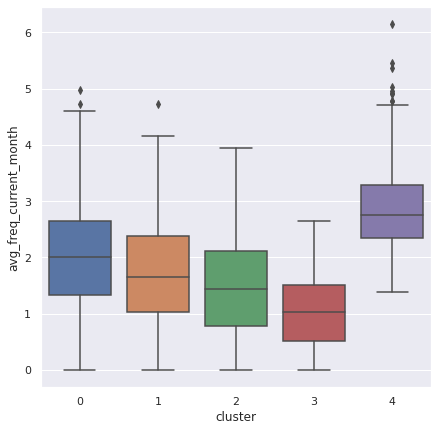

In [29]:
for column in ['month_to_end', 'age', 'avg_add_charges_total', 'lifetime', 'avg_freq_total', 'avg_freq_current_month']:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: шикарная визуализация!</div>

**Вывод**
<br/>
По многим показателям 3 кластер показывает результаты хуже остальных.


# Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами <a id='section_id_4'></a>

1) Необходимо делать упор на показатели "успешных" кластеров. Возможно использовать систему мотивации и бонусов. <br/>
2) Следует изучить менее успешные кластеры. Также предложить систему мотивации, которая сподвигнет "оттекающих" пользоваться абонементом чаще<br/>
3) Возможно, предложить другие виды абонементов с бонусами (тренировки с тренером для тех новичков, кто стесняется ходить в зал так как не знает что для чего, бесплатные купоны в фитнес-бар, консультации с диетологом и тд)<br/>
4) Но не стоит забывать,что существует категория людей, на которую ничего не сможет повлиять. Они просто не ходят или бросают после того, как пропала мотивация.

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но тут правильнее будет выделить ключевые отличия ушедших клиентов от оставшихся = это и есть потенциальные проблемы бизнеса, которые нужно решить — и сформировать на их основе рекомендации. Например, посетители с краткосрочными абонементами чаще уходят в отток, тогда есть смысл порекомендовать продумать скидочные и акционные предложения на более длительные абонементы</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Я бы еще сделала такие предположения.<br/>
    Выше отток в той группе людей, которые редко ходят в зал, у них ниже показатели по партнерским программам, следовательно ниже показатели по промо "приведи друга". Может, нужны какие-то мероприятия а-ля "день физкультурника" с уроками, мастер-классами, акциями для клиентов исключительно в этот день. Нужно мотивировать ходить чаще. А потом "чаще" должно конвертироваться в "чаще и дольше" :) <br/>
    Также видна зависимость оттока и посещающих групповые программы. И возможно, стоит делать упор на партнерские программы, так как, чем выше показатели, тем меньше отток.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: полностью согласен, супер!</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Чистый, структурированный проект, спасибо, такие всегда приятно проверять :)

Критичных замечаний нет, остальные комментарии можно найти в проекте.

**Я готов принять твой проект в этом виде, если ты просто отправишь его обратно**. Но если есть желание его доработать, с удовольствием посмотрю его еще раз :)
    
Готов ответить на любые вопросы!

<b>Удачи!</b>
        
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Спасибо! 💜
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Постарался ответить на твои вопросы :) Надеюсь, мои советы будут тебе полезны в дальнейшем!
    
Ну а теперь, как и обещал, я могу принять твою работу

<b>Успехов в обучении!</b>
        
</div>